## make_filepath_list関数のテスト

In [1]:
from voc import make_filepath_list

rootpath = "./data/VOCdevkit/VOC2012/"

train_img, train_anno, val_img, val_anno = make_filepath_list(rootpath)

print(train_img[0])
print(train_anno[0])
print(val_img[0])
print(val_anno[0])

./data/VOCdevkit/VOC2012/JPEGImages/2008_000008.jpg
./data/VOCdevkit/VOC2012/Annotations/2008_000008.xml
./data/VOCdevkit/VOC2012/JPEGImages/2008_000002.jpg
./data/VOCdevkit/VOC2012/Annotations/2008_000002.xml


## GetBBoxAndLabelクラスのテスト

In [2]:
import cv2
from voc import GetBBoxAndLabel

voc_labels = ["aeroplane", "bicycle", "bird", "boat", "bottle",
              "bus", "car", "cat", "chair", "cow",
              "diningtable", "dog", "horse", "motorbike",
              "person", "pottedplant", "sheep", "sofa", "train",
              "tvmonitor"]

annotation = GetBBoxAndLabel(voc_labels)
# validationのindex 1を読み込んでみる
index = 1
img_path = val_img[index]
img = cv2.imread(img_path)

height, width, _ = img.shape

annotation(val_anno[index], width, height)

array([[ 0.09      ,  0.03003003,  0.998     ,  0.996997  , 18.        ],
       [ 0.122     ,  0.56756757,  0.164     ,  0.72672673, 14.        ]])

確認 : validationの2つ目のデータは2つのオブジェクトが存在するためアノテーションリストには2つのデータが追加される. またBBoxのパラメータは0~1に正規化される.

## augmentations.pyのテスト

In [3]:
from voc import DataTransform
import matplotlib.pyplot as plt


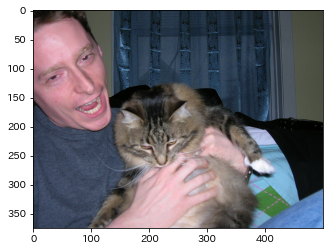

In [4]:
img_filepath = train_img[19]
img = cv2.imread(img_filepath)
height, width, _ = img.shape

gbl = GetBBoxAndLabel(voc_labels)

bbox_label = gbl(train_anno[19], width, height)

# オリジナルイメージを表示
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


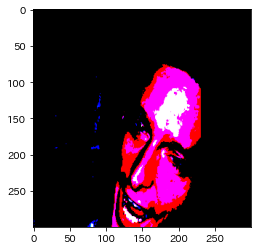

In [5]:
color_mean = (104, 117, 123)
input_size = 300
transform = DataTransform(input_size, color_mean)

phase = "train"
img_transformed, boxes, labels = transform(
    img,
    phase,
    bbox_label[:, :4],
    bbox_label[:, 4]
)

plt.imshow(cv2.cvtColor(img_transformed, cv2.COLOR_BGR2RGB))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


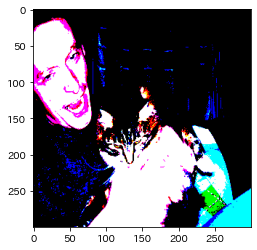

In [6]:
phase = "val"
img_transformed, boxes, labels = transform(
    img,
    phase,
    bbox_label[:, :4],
    bbox_label[:, 4]
)

plt.imshow(cv2.cvtColor(img_transformed, cv2.COLOR_BGR2RGB))
plt.show()